In [ ]:
import pandas as pd
import glob
import os

# Tüm CSV dosyalarının bulunduğu klasör
data_folder = "/content/data"

# Tüm CSV dosyalarını oku
csv_files = glob.glob(os.path.join(data_folder, "AllDataFor_*.csv"))
df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

print(f"Toplam satır sayısı: {combined_df.shape[0]}")
print(f"Toplam sütun sayısı: {combined_df.shape[1]}\n")


# Gerçek zamanlı alınan veriler (örnek değerler)
real_time_data = {
    "segment_length": 100.05,
    "slope": 0.9495,
    "avg_vehicle_speed": 11.3,
    "avg_Acceleration": -0.1742,
    "avg_Total_Mass": 1155.56
}

# Her özelliğin standart sapmasını hesapla
stds = combined_df[["segment_length", "slope", "avg_vehicle_speed", "avg_Acceleration", "avg_Total_Mass"]].std()

tolerance = {
    "segment_length": min(real_time_data["segment_length"] * 0.30, 30),  # %30 veya max 30 m
    "slope": 1.0,  # Sabit: ±1 derece
    "avg_vehicle_speed": min(real_time_data["avg_vehicle_speed"] * 0.30, 10),  # %30 veya max 10 km/h
    "avg_Acceleration": 0.5,  # Sabit: ±0.5 m/s²
    "avg_Total_Mass": min(real_time_data["avg_Total_Mass"] * 0.15, 150)  # %15 veya max 150 kg
}


# Tolerans değerlerini yazdır
print("Tolerans değerleri (1 std):")
for key, value in tolerance.items():
    print(f"- {key}: ±{value:.4f}")
print("\n")

# Filtreleme işlemi
filtered_df = combined_df[
    (combined_df["segment_length"].between(real_time_data["segment_length"] - tolerance["segment_length"],
                                           real_time_data["segment_length"] + tolerance["segment_length"])) &
    (combined_df["slope"].between(real_time_data["slope"] - tolerance["slope"],
                                  real_time_data["slope"] + tolerance["slope"])) &
    (combined_df["avg_vehicle_speed"].between(real_time_data["avg_vehicle_speed"] - tolerance["avg_vehicle_speed"],
                                              real_time_data["avg_vehicle_speed"] + tolerance["avg_vehicle_speed"])) &
    (combined_df["avg_Acceleration"].between(real_time_data["avg_Acceleration"] - tolerance["avg_Acceleration"],
                                             real_time_data["avg_Acceleration"] + tolerance["avg_Acceleration"])) &
    (combined_df["avg_Total_Mass"].between(real_time_data["avg_Total_Mass"] - tolerance["avg_Total_Mass"],
                                           real_time_data["avg_Total_Mass"] + tolerance["avg_Total_Mass"]))
]

# Sonuç boş değilse km başına enerji tüketimi hesapla
if not filtered_df.empty:
    filtered_df["km_energy_consumption"] = filtered_df["Total_Energy_Consumption"] / (filtered_df["segment_length"] / 1000)
    average_km_consumption = filtered_df["km_energy_consumption"].mean()


    # Tolerans değerlerini yazdır
    print("örnek segment data:")
    for key, value in real_time_data.items():
        print(f"- {key}: {value:.4f}")


    print(f"\nOrtalama km başına enerji tüketimi: {average_km_consumption:.2f} Wh/km")
    remaining_energy = (51 / 100) * 15.6 * 1000    # SOC değeri 52 olarak sabit alınmış deneme için
    remaining_range = remaining_energy / average_km_consumption
    print(f"\nKalan Menzil: {remaining_range:.2f} km")
else:
    print("Verilen kriterlere uygun geçmiş veri bulunamadı.")


Toplam satır sayısı: 3897
Toplam sütun sayısı: 9

Tolerans değerleri (1 std):
- segment_length: ±30.0000
- slope: ±1.0000
- avg_vehicle_speed: ±3.3900
- avg_Acceleration: ±0.5000
- avg_Total_Mass: ±150.0000


örnek segment data:
- segment_length: 100.0500
- slope: 0.9495
- avg_vehicle_speed: 11.3000
- avg_Acceleration: -0.1742
- avg_Total_Mass: 1155.5600

Ortalama km başına enerji tüketimi: 185.14 Wh/km

Kalan Menzil: 42.97 km


<ipython-input-16-dd71fa8223a8>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["km_energy_consumption"] = filtered_df["Total_Energy_Consumption"] / (filtered_df["segment_length"] / 1000)


In [ ]:

#  Toleransı 1 veya 1.5 standart sapma olarak belirle
#tolerance = {
#    "segment_length": stds["segment_length"] * 1,
#    "slope": stds["slope"] * 1,
#    "avg_vehicle_speed": stds["avg_vehicle_speed"] * 1,
#    "avg_Acceleration": stds["avg_Acceleration"] * 1,
#    "avg_Total_Mass": stds["avg_Total_Mass"] * 1
#}

# Toleransları hem yüzde hem de maksimumla sınırlıyoruz
#tolerance = {
#    "segment_length": min(real_time_data["segment_length"] * 0.05, 10),  # %5 veya max 10 m
#    "slope": min(real_time_data["slope"] * 0.2, 1),                       # %20 veya max 1 derece
#    "avg_vehicle_speed": min(real_time_data["avg_vehicle_speed"] * 0.1, 3),  # %10 veya max 3 km/h
#    "avg_Acceleration": min(abs(real_time_data["avg_Acceleration"]) * 0.5, 0.5),  # %50 veya max 0.5 m/s²
#    "avg_Total_Mass": min(real_time_data["avg_Total_Mass"] * 0.1, 150)     # %10 veya max 150 kg
#}


📊 Temel İstatistikler:

       segment_length        slope  avg_vehicle_speed  avg_Acceleration  \
count     2493.000000  2493.000000        2493.000000       2493.000000   
mean       100.154667    -0.024963          22.322694         -0.049695   
std         42.087347     3.083985           8.296181          0.763832   
min          0.000000    -8.073943           1.257576         -7.579545   
25%         69.293558    -2.250502          15.159570         -0.142857   
50%         90.759710     0.018863          21.500000          0.000000   
75%        136.162733     2.320037          26.145161          0.140000   
max        198.943454     8.550880          54.183229          4.037879   

       avg_Total_Mass  
count     2493.000000  
mean      1008.955074  
std        197.900247  
min        775.000000  
25%        775.000000  
50%       1195.000000  
75%       1195.000000  
max       1220.000000  

📈 Varyasyon Katsayısı (CV):
- segment_length: 0.4202
- slope: -123.5416
- avg_vehi

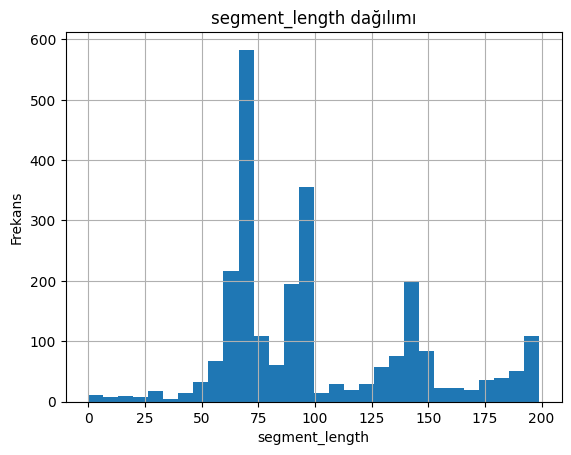

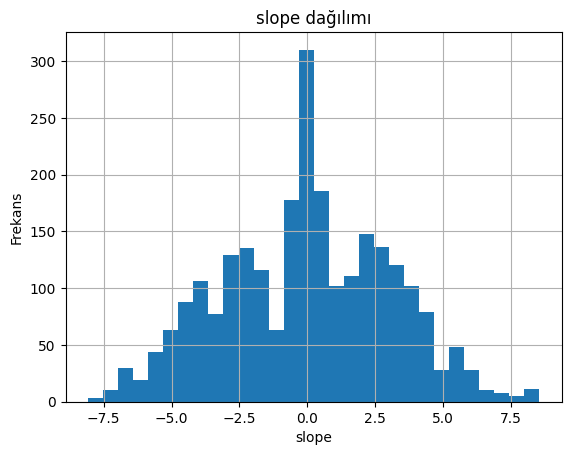

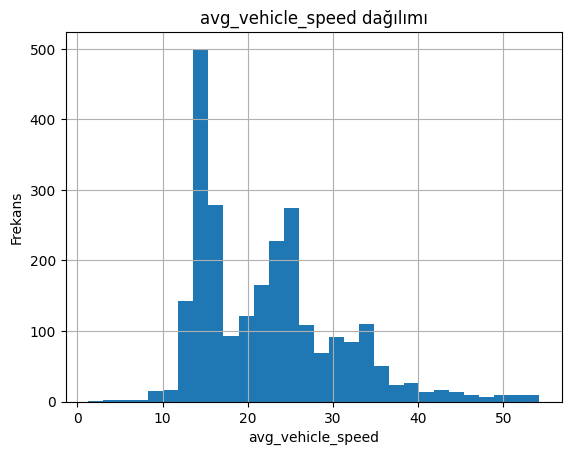

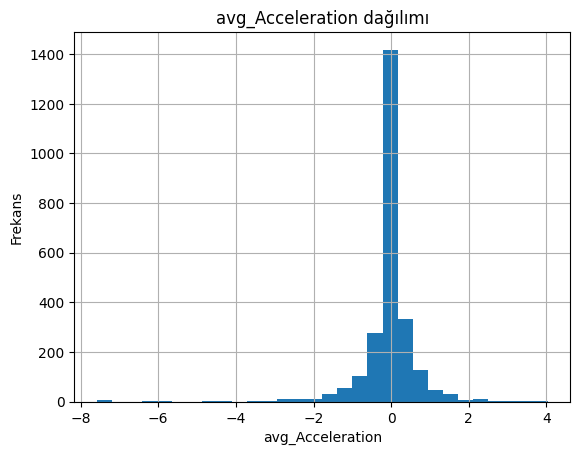

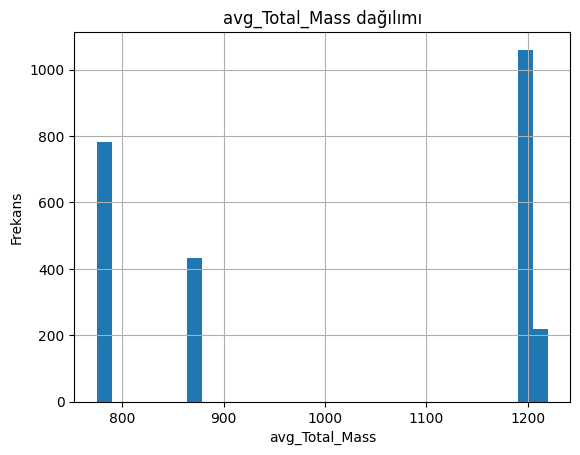

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. CSV dosyasını oku
df = pd.read_csv("/content/data.csv")

# 3. Kullanılacak kolonları belirt
columns = ["segment_length", "slope", "avg_vehicle_speed", "avg_Acceleration", "avg_Total_Mass"]

# 4. Temel istatistikleri göster
print("\n📊 Temel İstatistikler:\n")
print(df[columns].describe())

# 5. Varyasyon katsayısı (Coefficient of Variation - CV) hesapla
means = df[columns].mean()
stds = df[columns].std()
cv = stds / means

print("\n📈 Varyasyon Katsayısı (CV):")
for col in columns:
    print(f"- {col}: {cv[col]:.4f}")

# 6. Tolerans yüzdeleri (veri dağılımına dayalı önerilen)
tolerance_percentages = {
    "segment_length": "±30%",
    "slope": "±1 derece (sabit)",  # çünkü ortalama ≈ 0
    "avg_vehicle_speed": "±30%",   #Ortalama ≈ 22.3 km/h, std ≈ 8.3 km/h, CV = 0.37 Geniş bir dağılım var → %30 tolerans (~±6.7 km/h) uygun
    "avg_Acceleration": "±0.5 m/s² (sabit)",  # çünkü ortalama ≈ 0
    "avg_Total_Mass": "±15%"
}

print("\n🎯 Önerilen Tolerans Yüzdeleri (Veriye Göre):")
for key, value in tolerance_percentages.items():
    print(f"- {key}: {value}")

# 7. Opsiyonel: Histogram ile veri dağılımlarını gör
for col in columns:
    df[col].hist(bins=30)
    plt.title(f"{col} dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import glob
import os



# Tüm CSV dosyalarını oku

combined_df = pd.read_csv("/content/data.csv")

print(f"Toplam satır sayısı: {combined_df.shape[0]}")
print(f"Toplam sütun sayısı: {combined_df.shape[1]}\n")


# 4. Temel istatistikleri göster
print("\n📊 Temel İstatistikler:\n")
print(combined_df.describe())

combined_df["km_energy_consumption"] = combined_df["Total_Energy_Consumption"] * 1000 /combined_df["segment_length"]
combined_df["km_energy_consumption"].mean()




Toplam satır sayısı: 2483
Toplam sütun sayısı: 9


📊 Temel İstatistikler:

           segment  segment_length        slope  avg_vehicle_speed  \
count  2483.000000     2483.000000  2483.000000        2483.000000   
mean      9.535642      100.356256    -0.029219          22.345794   
std       6.808287       41.835340     3.088376           8.303643   
min       0.000000        2.119478    -8.073943           1.257576   
25%       4.000000       69.339503    -2.263155          15.159053   
50%       8.000000       90.847869     0.020063          21.517284   
75%      14.000000      136.167337     2.320419          26.172879   
max      27.000000      198.943454     8.550880          54.183229   

       avg_Acceleration  avg_Total_Mass  SOC_difference  \
count       2483.000000     2483.000000     2483.000000   
mean          -0.050253     1009.220701        0.073331   
std            0.765060      197.823488        0.083651   
min           -7.579545      775.000000       -0.073000   

np.float64(119.56938877873067)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
pip install -U scikit-learn

In [ ]:
# Veriyi oku
df = pd.read_csv("/content/CombinedDataWithNewSegments_100m.csv")

# Wh/km hesapla: Total_Energy_Consumption / (segment_length in km)
df["wh_per_km"] = df["Total_Energy_Consumption"] / (df["segment_length"] / 1000)


# Kullanılacak özellikler
features = [
    "segment_length",
    "slope",
    "avg_vehicle_speed",
    "avg_Acceleration",
    "avg_Total_Mass"
]

# Girdi ve hedef
X = df[features]
y = df["wh_per_km"]

# Eğitim/test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluştur ve eğit
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)


# Performans ölçümü
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("RMSE:", rmse)


R2 Score: 0.940533870781978
RMSE: 37.53636837513269


In [ ]:
# Örnek bir segment verisi (örnek değerler)
example_segment = {
    "segment_length": 100,           # metre
    "slope": 2.0,                    # derece/derece
    "avg_vehicle_speed": 15.0,       # km/h
    "avg_Acceleration": 0.1,         # m/s^2
    "avg_Total_Mass": 1200           # kg
}

# Pandas DataFrame'e dönüştür
segment_df = pd.DataFrame([example_segment])

# Bu segment için tahmini Wh/km tüketimi
predicted_wh_per_km = model.predict(segment_df)[0]

print(f"Tahmini Wh/km tüketimi: {predicted_wh_per_km:.2f} Wh/km")

# Farklı kalan enerji değerleri için menzil hesapla (Wh biriminde)
remaining_energy_list = [60000, 40000, 20000, 10000]  # Wh

print("\nKalan Enerjiye Göre Tahmini Menzil (km):")
for remaining_energy in remaining_energy_list:
    estimated_range_km = remaining_energy / predicted_wh_per_km
    print(f"  Enerji: {remaining_energy} Wh --> Menzil: {estimated_range_km:.2f} km")


Tahmini Wh/km tüketimi: 207.42 Wh/km

Kalan Enerjiye Göre Tahmini Menzil (km):
  Enerji: 60000 Wh --> Menzil: 289.27 km
  Enerji: 40000 Wh --> Menzil: 192.84 km
  Enerji: 20000 Wh --> Menzil: 96.42 km
  Enerji: 10000 Wh --> Menzil: 48.21 km


In [ ]:
def estimate_range_dynamic(segments_df, remaining_energy_wh, model, segment_window=5):
    """
    segments_df: İlerideki segmentleri içeren bir DataFrame
    remaining_energy_wh: Aracın mevcut enerjisi (Wh)
    model: Eğitilmiş ML modeli
    segment_window: Kaç segment ileriye bakılacak
    """
    features = ["segment_length", "slope", "avg_vehicle_speed", "avg_Acceleration", "avg_Total_Mass"]

    # Sadece segment_window kadar veri al
    future_segments = segments_df[features].head(segment_window)

    # Segmentler için wh_per_km tahminleri al
    predicted_consumptions = model.predict(future_segments)

    # Ortalama Wh/km tüketimini hesapla
    avg_wh_per_km = predicted_consumptions.mean()

    # Menzil = kalan enerji / ortalama tüketim
    estimated_range_km = remaining_energy_wh / avg_wh_per_km

    return estimated_range_km, avg_wh_per_km


In [ ]:
# Örneğin sonradan gelen 10 segmentlik veriyi simüle edelim (gerçek uygulamada bu gerçek zamanlı olabilir)
future_segments_df = df.sample(10)  # veya sıradaki segmentleri sırayla alırsın

# Enerji örneği: 40000 Wh
estimated_range_km, avg_consumption = estimate_range_dynamic(future_segments_df, 40000, model)

print(f"Ortalama tüketim (Wh/km): {avg_consumption:.2f}")
print(f"40000 Wh için tahmini menzil: {estimated_range_km:.2f} km")


Ortalama tüketim (Wh/km): 29.43
40000 Wh için tahmini menzil: 1359.25 km


In [ ]:
def estimate_range_dynamic_with_limit_corrected(segments_df, remaining_energy_wh, model, segment_window=5, min_consumption=20, max_consumption=25):
    features = ["segment_length", "slope", "avg_vehicle_speed", "avg_Acceleration", "avg_Total_Mass"]

    future_segments = segments_df[features].head(segment_window)

    # Segment başına tahmin edilen enerji tüketimini al
    predicted_consumptions = model.predict(future_segments)
    predicted_consumptions = np.clip(predicted_consumptions, min_consumption, max_consumption)  # Tüketimi sınırla

    avg_wh_per_km = predicted_consumptions.mean()

    # Kalan enerji üzerinden menzil tahminini yap
    estimated_range_km = remaining_energy_wh / avg_wh_per_km

    # Enerji azalma
    energy_used_for_segments = sum(predicted_consumptions * future_segments["segment_length"])  # Her segmentin tükettiği enerji
    remaining_energy_wh -= energy_used_for_segments  # Enerji azalır

    return estimated_range_km, avg_wh_per_km, predicted_consumptions, remaining_energy_wh

# Başlangıçta kalan enerji
initial_remaining_energy_wh = 40000  # Wh

# Simülasyon için başlangıç verisi
total_segments = 10  # Gelecek 10 segment
remaining_energy = initial_remaining_energy_wh

for i in range(total_segments):
    # Her defasında veri değişiyor, burada sırasıyla segment seçiyoruz
    future_segments_df = df.sample(1)  # Gerçek uygulamada yeni gelen verilerle değişebilir

    # Her segment geldiğinde menzil tahminini yapıyoruz
    estimated_range_km, avg_consumption, predicted_consumptions, remaining_energy = estimate_range_dynamic_with_limit_corrected(
        future_segments_df, remaining_energy, model
    )

    # Eğer enerji negatifse durdur (kapanış yap)
    if remaining_energy <= 0:
        remaining_energy = 0
        print(f"Segment {i+1}: Enerji bitmiş, menzil sıfırlanmıştır.")
        break

    print(f"Segment {i+1}:")
    print(f"Ortalama tüketim (Wh/km): {avg_consumption:.2f}")
    print(f"40000 Wh için tahmini menzil: {estimated_range_km:.2f} km")
    print(f"Kalan enerji: {remaining_energy:.2f} Wh\n")


Segment 1:
Ortalama tüketim (Wh/km): 25.00
40000 Wh için tahmini menzil: 1600.00 km
Kalan enerji: 37757.86 Wh

Segment 2:
Ortalama tüketim (Wh/km): 25.00
40000 Wh için tahmini menzil: 1510.31 km
Kalan enerji: 35337.44 Wh

Segment 3:
Ortalama tüketim (Wh/km): 25.00
40000 Wh için tahmini menzil: 1413.50 km
Kalan enerji: 32938.02 Wh

Segment 4:
Ortalama tüketim (Wh/km): 25.00
40000 Wh için tahmini menzil: 1317.52 km
Kalan enerji: 30738.92 Wh

Segment 5:
Ortalama tüketim (Wh/km): 25.00
40000 Wh için tahmini menzil: 1229.56 km
Kalan enerji: 28321.34 Wh

Segment 6:
Ortalama tüketim (Wh/km): 25.00
40000 Wh için tahmini menzil: 1132.85 km
Kalan enerji: 25901.66 Wh

Segment 7:
Ortalama tüketim (Wh/km): 25.00
40000 Wh için tahmini menzil: 1036.07 km
Kalan enerji: 23826.40 Wh

Segment 8:
Ortalama tüketim (Wh/km): 25.00
40000 Wh için tahmini menzil: 953.06 km
Kalan enerji: 21436.61 Wh

Segment 9:
Ortalama tüketim (Wh/km): 25.00
40000 Wh için tahmini menzil: 857.46 km
Kalan enerji: 19629.05 Wh

Seg

In [ ]:
data = pd.read_csv("/content/CombinedDataWithNewSegments_100m.csv")
data.describe()

,segment,segment_length,slope,avg_vehicle_speed,avg_Acceleration,avg_Total_Mass,avg_Torque_Measured,SOC_difference,Total_Energy_Consumption,avg_Temperature
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,9.427350,90.106552,0.001247,25.165262,0.015823,1040.299145,7.462459,0.070865,11.842000,29.525641
std,5.784864,7.183227,3.209253,10.739622,0.852197,169.445309,9.502941,0.073636,11.993448,1.966289
min,0.000000,67.069399,-7.366911,11.388277,-2.831818,870.000000,-15.021785,-0.073000,-12.324000,27.500000
25%,4.000000,87.341369,-2.200283,15.184972,-0.250755,870.000000,0.276711,0.014000,2.457000,27.500000
50%,10.000000,92.318728,-0.032939,23.253609,-0.012212,1195.000000,6.485194,0.054500,9.984000,28.000000
75%,14.000000,95.188336,2.334179,32.764510,0.294381,1220.000000,14.110049,0.119000,19.929000,31.500000
max,19.000000,99.453923,8.242154,53.414773,3.686147,1220.000000,33.815742,0.296000,47.268000,31.500000
